# Ordinary Least Squares (OLS) vs. Gradient Descent (GD): Academic Performance

## 1) Framing the Problem

Multiple regression is a statistical technique used to model the relationship between one dependent variable (or label) and two or more independent variables (or features). It is a powerful tool for understanding how changes in independent variables influence the dependent variable. While this modeling approach can be implemented using various strategies, I will focus on two main methods: 
- **Ordinary Least Squares (OLS)**, which derives the solution through pure mathematical analysis, 
- **Gradient Descent (GD)**, an iterative optimization algorithm often associated with machine learning.

Python packages exist for conducting multiple regression, but this article will show how to derive the regression parameters using both OLS and GD from scratch. 

However, both methods will compare their results to particular packages: 
- OLS with scipy vs. OLS with numpy
- OLS vs. statsmodels
- GD vs. scikit-learn

All in all, this article will compare performance and applicability for multiple regression based on the following criteria:
- **Computational Speed**: How quickly each method converges to a solution, particularly for datasets of varying sizes and dimensionalities.
- **Memory Usage**: The amount of memory required by each approach, especially for large datasets where matrix operations (OLS) may become prohibitive.
- **Convergence Behavior**: The robustness of GD to hyperparameter tuning (e.g., learning rate) and its ability to converge to an optimal solution in different conditions.
- **Numerical Stability**: How each method performs when faced with ill-conditioned data or high multicollinearity among independent variables.
- **Scalability**: Suitability for big data scenarios, where the efficiency of processing may differ significantly between the two methods.
- **Ease of Implementation**: Practical considerations, including code complexity, ease of debugging, and availability of libraries or tools.
- **Accuracy**: The ability of each method to minimize the error term (residuals) and produce reliable parameter estimates under different scenarios.

By doing so, you'll get a sense of which scenario is preferable over the other. For example:
- OLS may excel in smaller datasets where computational resources are not constrained.
- GD is often the method of choice for very large datasets or when working with models that extend beyond linear regression, such as neural networks.

By analyzing these aspects, this article aims to provide a comprehensive comparison to help readers choose the appropriate method for their specific use case.

First, let's focus on how the parameters are derived with OLS and GD.

### **Background: How to Use...**

### **Ordinary Least Squares (OLS)**

#### **0) How to Get Started**

We start with the following equation:

$$Xβ = y$$

Where:

*X* := The design matrix of independent variables\
*β* := The vector of parameters (coefficients to be estimated)\
*y* := The vector of the dependent variable

This is not possible, however, since there is always an error value, known as the *residuals*. 

Thus:

$$X\hat{β} + ε = \hat{y}$$

With that in mind, OLS can be derived through various approaches:

#### **1) Optimization using calculus**  

In this scenario, we minimize the norm of $y - \hat{y}$, which will give us the vector of parameters. $$\min_β |y - \hat{y}| = \min_β |y - X\hat{β}|^2$$

I won't do the math for this, but if you're interested, it requires calculus and is a stronger solution since it follows along the maximum likelihood estimation (MLE).

#### **2) Using the Left Inverse**

Because $Xβ$ is assumed to be full column rank, we can derive *β*.

In other words, if we multiply $Xβ$ by its transpose, we can then multiply it by its inverse.

Thus:

$$X^TXβ = X^Ty$$
$$(X^TX)^{-1}X^TXβ = (X^T X)^{-1}X^Ty$$
$$Iβ = (X^TX)^{-1}X^Ty$$
$$β = (X^T X)^{-1}X^Ty$$

Note:
*I* = The identity matrix

Because β is predicting y, it is better to conclude that this derivation represents $\hat{β}$.

This is not the best approach because we are assuming $Xβ$ is full column rank, which may not be true if there is **Multicollinearity**.

Why? If one parameter is a linear combination of any of the others, then the design matrix $X$ is not of full column rank (e.g. $β_3 = 4*β_1$).

#### **3) Transforming $X$ to Row Canonical Form**

The equation

$$X^TXβ = X^Ty$$

can be row reduced to its canonical form to get the vector of parameters as well.

This will make sense in the next derivation.

#### **4) Using Orthogonal Projections**

$Xβ = y$ can be seen as having a projection and an orthogonal component.

If we view the parameters as predictions, then we have a projection:
$$X\hat{β} = \hat{y}$$

This is also known as $\hat{y}$ projected onto the column space of $X\hat{β}$

The orthogonal component will be the nullspace $X\hat{β}$, which is the residual: $y - \hat{y}$ (or $y - X\hat{β}$)

In other words, the *residual* (orthogonal) and *prediction* (projection) add up to the vector of the dependent variable: y

What now?

Given that $y - X\hat{β}$ is orthogonal to the column space of $X$, then it's orthogonal to each column of $X$:

$$X^T*(y - X\hat{β}) = 0$$
$$X^Ty - X^TX\hat{β} = 0$$
$$X^Ty = X^TX\hat{β}$$
$$(X^TX)^{-1}X^Ty = \hat{β}$$

We could have solved for that using row reduction, where $X^TX$ is augmented by $X^Ty$, then put into row canonical form.

#### **Conclusion**

Regardless of which approach you use with OLS, the coefficients will be:
$$\hat{β} = (X^TX)^{-1}X^Ty$$

<!-- #### **0) How to Get Started**

With GD, you must decide a cost function, AKA a loss or an objective function.

For multiple regression, we start with the mean square error (MSE) as the cost function (it is most common):

$$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \beta_0 - \mathbf{x}_i^T \boldsymbol{\beta})^2$$

Where:

*N* := Number of data points\
*y_i* := The vector of the dependent variable\
*β_0* := The scalar of the independent variable's intercept\
*β_i* := The vector of parameters (coefficients to be estimated)\
*x_i* := The vector of independent variables

Note: This has not been put in matrix form because GD uses calculus.

At first, you might think, "How can I calculate the residual without first having values for the parameters?"

GD iteratively determines the parameters' values.

You add the value of the partial derivative of the MSE with regard to the particular parameter:

$$\frac{\partial MSE}{\partial \beta_0} = -\frac{2}{N} \sum_{i=1}^N (y_i - \beta_0 - \mathbf{x}_i^T \boldsymbol{\beta_i})$$

$$\frac{\partial MSE}{\partial {\beta_i}} = -\frac{2}{N} \sum_{i=1}^{N}(y_i - \beta_0 + \mathbf{x}_i^T \boldsymbol{\beta_i}) * x_i$$

Now, let's set the parameters to 0 and add a learning rate (α) and number of times (i.e. epochs) to update each parameter.

$\alpha = 0.01$ will be the learning rate, and $t = 100$ will be the number of epochs.

We want to update the model parameters using the following equations:

$$\beta_0^{t+1} = \beta_0 + \alpha \cdot \frac{\partial MSE}{\partial \beta_0}$$

$$\beta_i^{t+1} = \beta_i + \alpha \cdot \frac{\partial MSE}{\partial \beta_i}$$

Substituting the derivatives we found earlier:

$$\beta_0^{t+1} = \beta_0^{t+1} + 0.01 \cdot (-\frac{2}{N} \sum_{i=1}^{N}(y_i - (\beta_0^{t+1} + \beta_i x_i)))$$

$$\beta_i^{t+1} = \beta_i + 0.01 \cdot (-\frac{2}{N} \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i})) \cdot \boldsymbol{x_i})$$

Simplifying the equations:

$$\beta_0^{t+1} = \beta_0 - 0.02 \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i}))$$

$$\beta_i^{t+1} = \beta_i - 0.02 \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i})) \cdot \boldsymbol{x_i}$$ -->

### **Gradient Descent (GD)**

#### **0) How to Get Started**

To perform Gradient Descent (GD), you must first decide on a cost function, also known as a loss or objective function.

For multiple regression, we typically use the mean squared error (MSE) as the cost function:

$$MSE = \frac{1}{N} \| \mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2$$

Where:

*N* := Number (scalar) of data points\
*y* := Vector of dependent variables (N * 1)\
*β_0* := Scalar intercept term\
*1* := Vector of 1's (n * 1)\
*X* := Matrix of independent variables (M * N)\
*β* := Vector of parameters (coefficients to be estimated, N * 1)

At first, you might think, "How can I calculate the residual without first having values for the parameters?"

GD iteratively determines the parameters' values updating the parameters at each step based on the gradient of the cost function, which, in this case, is the MSE.

You add the value of the partial derivative of the MSE with regard to the particular parameter:

$$\frac{\partial MSE}{\partial \beta_0} = -\frac{2}{N} \mathbf{1}^T (\mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta})$$

$$\frac{\partial MSE}{\partial \boldsymbol{\beta}} = -\frac{2}{N} \mathbf{X}^T (\mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta})$$

Now, let's set the parameters to 0 and add a learning rate (α) and number of times (i.e. epochs) to update each parameter.

$α = 0.01$ will be the learning rate, and $t = 100$ will be the number of epochs.

The updates for the parameters are:

$$\beta_0^{(t+1)} = \beta_0^{(t)} - \alpha \cdot \frac{\partial MSE}{\partial \beta_0}$$

$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \alpha \cdot \frac{\partial MSE}{\partial \boldsymbol{\beta}}$$

Substituting the derivatives into the update equations:

$$\beta_0^{(t+1)} = \beta_0^{(t)} + \frac{2 \alpha}{N} \mathbf{1}^T (\mathbf{y} - \beta_0^{(t)} \mathbf{1} - \mathbf{X} \boldsymbol{\beta}^{(t)})$$

$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} + \frac{2 \alpha}{N} \mathbf{X}^T (\mathbf{y} - \beta_0^{(t)} \mathbf{1} - \mathbf{X} \boldsymbol{\beta}^{(t)})$$

#### **Conclusion**

The expressions $\beta_0^{(t+1)}$ and $\boldsymbol{\beta}^{(t+1)}$ would give us the intercept and vector of parameters.

## 2) Gathering the Data

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).

The dataset examines the factors influencing academic student performance, including:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

The target variable, performance index, measures each student's overall performance. The index, rounded to the nearest integer, ranges from 10 to 100, with higher values indicating better performance.

In [28]:
# The dataset will come from Kaggle:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Path to dataset files:", path)

100%|██████████| 48.5k/48.5k [00:00<00:00, 20.5MB/s]

Extracting files...
Path to dataset files: /Users/alexdubro/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


### Importing the Necessary Packages

In [128]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd 
from scipy.linalg import pinv
import seaborn as sns 
import statsmodels.api as sm

In [129]:
dataset_path = os.path.join(path, 'Student_Performance.csv')

raw_data = pd.read_csv(dataset_path)
raw_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## 3) Cleaning/preprocessing data

In [130]:
# 1) Removing null data

raw_data.dropna(inplace=True)

# 2) Removing duplicates

raw_data.drop_duplicates(inplace=True)

Because there is a categorical variable, the data must be dummy coded. This will be done using using one-hot encoding.

In [131]:
raw_data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [132]:
updated_data = pd.get_dummies(raw_data, columns=['Extracurricular Activities'], dtype=int)
updated_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [ ]:
# Targeting data

y = updated_data['Performance Index']
X = updated_data.drop('Performance Index', axis=1)
cols = ['Intercept'] + X.columns.tolist()

X_with_intercept = np.column_stack([np.ones(len(X)), X])
X_transpose = np.transpose(X_with_intercept)

## 4) Visualizing the Data

What do know about the students?

In [44]:
updated_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651,0.505014,0.494986
std,2.589081,17.325601,1.697683,2.867202,19.208570,0.500000,0.500000
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,1.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000,1.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000,1.000000


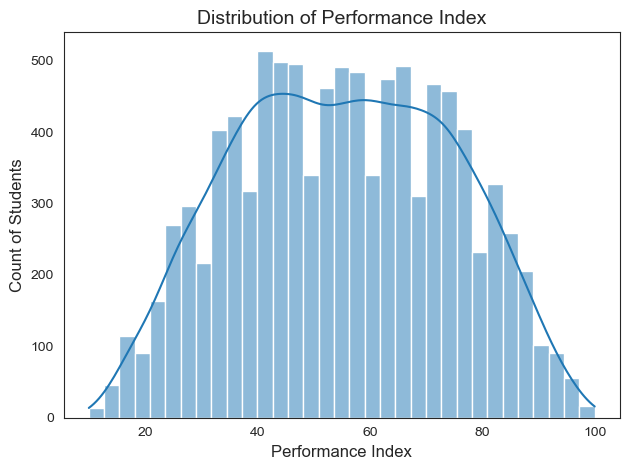

In [176]:
sns.histplot(x='Performance Index', data=updated_data, kde=True)
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.title('Distribution of Performance Index', fontsize=14)
plt.tight_layout()
plt.show()

In [162]:
mask = np.zeros_like(updated_data.corr())
upper_triangle = np.triu_indices_from(mask)
mask[upper_triangle] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

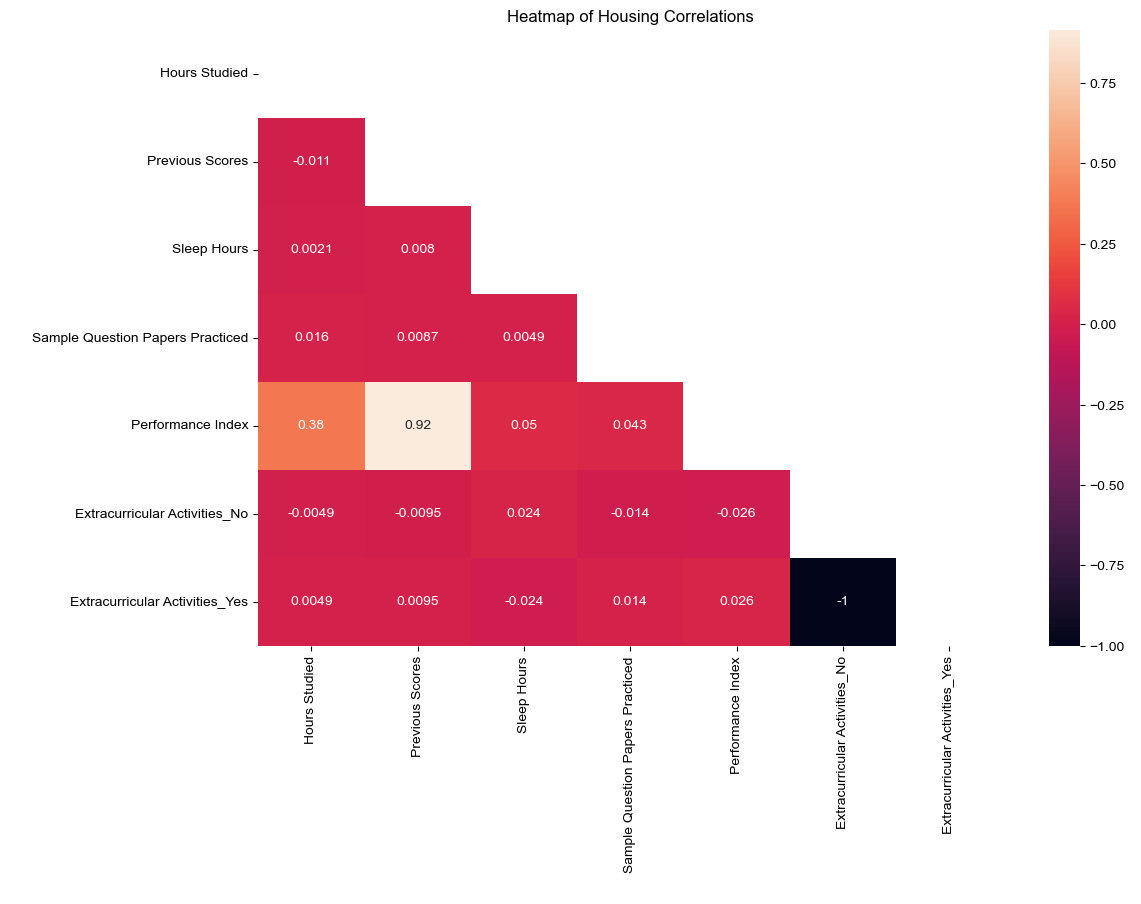

In [163]:
plt.figure(figsize=(12, 8))

sns.heatmap(updated_data.corr(), mask=mask, annot=True).set(title='Heatmap of Housing Correlations')
sns.set_style('white')
plt.show()

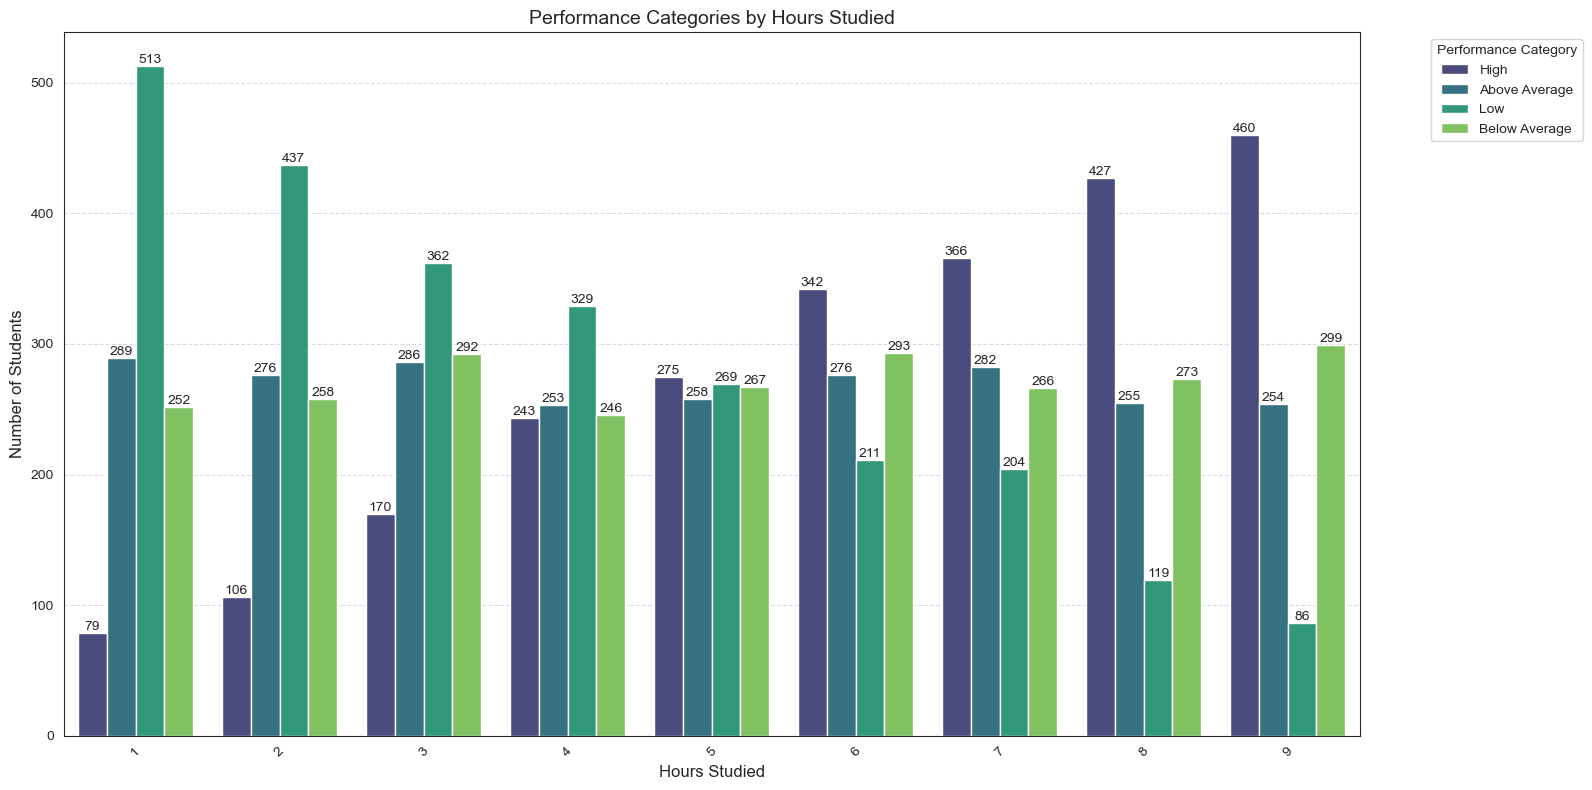

Performance Category Thresholds:
Q1 (25th percentile): 40.00
Median (50th percentile): 55.00
Q3 (75th percentile): 70.00

Performance Category Distribution:
Performance Category
Low              2530
High             2468
Below Average    2446
Above Average    2429
Name: count, dtype: int64

Percentage Distribution:
Performance Category
Low              25.625443
High             24.997468
Below Average    24.774638
Above Average    24.602451
Name: proportion, dtype: float64


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate quartiles for more meaningful categorization
q1 = updated_data['Performance Index'].quantile(0.25)
q2 = updated_data['Performance Index'].quantile(0.5)  # Median
q3 = updated_data['Performance Index'].quantile(0.75)

# Create Performance Category column with more granular categories
def categorize_performance(performance):
    if performance <= q1:
        return 'Low'
    elif performance <= q2:
        return 'Below Average'
    elif performance <= q3:
        return 'Above Average'
    else:
        return 'High'

updated_data['Performance Category'] = updated_data['Performance Index'].apply(categorize_performance)

# Create the plot
plt.figure(figsize=(16, 8))
sns.countplot(
    data=updated_data,
    x='Hours Studied',
    hue='Performance Category',
    palette='viridis',
    order=sorted(updated_data['Hours Studied'].unique())
)

# Customize plot
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Performance Categories by Hours Studied', fontsize=14)
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value annotations on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed information
print("Performance Category Thresholds:")
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Median (50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print("\nPerformance Category Distribution:")
print(updated_data['Performance Category'].value_counts())
print("\nPercentage Distribution:")
print(updated_data['Performance Category'].value_counts(normalize=True) * 100)

## 5) Training & Building the Algorithm: Deriving Parameters Using OLS & GD 

## Ordinary Least Squares (OLS)

We will be using the following equation to derive the parameters for OLS:

$$\hat{β} = (X^TX)^{-1}X^Ty$$

NumPy

In [137]:
beta_encoding_numpy = np.linalg.inv(X_transpose @ X_with_intercept) @ X_transpose @ y

pd.Series(data=beta_encoding_numpy, index=cols)

Intercept                          -138.946289
Hours Studied                         2.855284
Previous Scores                       1.018782
Sleep Hours                           0.541864
Sample Question Papers Practiced      0.243364
Extracurricular Activities_No        68.990479
Extracurricular Activities_Yes       66.042480
dtype: float64

SciPy

In [155]:
beta_encoding_scipy = pinv(X_transpose @ X_with_intercept) @ X_transpose @ y

pd.Series(data=beta_encoding_scipy, index=cols)

Intercept                          -22.507045
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_No      -11.561869
Extracurricular Activities_Yes     -10.945176
dtype: float64

### $R^2$ Statistic

In [157]:
# R-squared

arr_result = X_with_intercept @ beta_encoding_scipy
y_i = np.array(y)
squared_res = ((y_i - arr_result)**2)
ss_res = sum(squared_res)

y_mean = updated_data['Performance Index'].mean()
y_mean_repeated = np.repeat(y_mean, y_i.shape[0])
squared_tot = ((y_i - y_mean_repeated)**2)
ss_tot = sum(squared_tot)

r_squared = 1 - (ss_res/ss_tot)
print("R^2 statistic:", r_squared)

R^2 statistic: 0.9886813814840943


### $F$-Test

In [159]:
# F-test

n = len(y)  # Number of observations
k = len(X.columns) # Number of predictors (excluding intercept)

# Assuming r_squared and ss_res (sum of squared residuals) are already calculated
numerator = r_squared / k
denominator = (1 - r_squared) / (n - k - 1)

f_test = numerator / denominator
print("F-test statistic:", f_test)

F-test statistic: 143632.5245290118


In [158]:
# Calculate SS_reg (explained variance)
y_mean = y.mean()
y_pred = np.dot(X_with_intercept, beta_encoding_scipy)
ss_reg = sum((y_pred - y_mean) ** 2)

# Calculate SS_res (unexplained variance)
ss_res = sum((y - y_pred) ** 2)

# Number of predictors (k) and observations (n)
n = len(y)
k = X_with_intercept.shape[1] - 1  # Exclude intercept

# F-statistic calculation
numerator = ss_reg / k
denominator = ss_res / (n - k - 1)
f_test = numerator / denominator

print("F-test statistic:", f_test)


F-test statistic: 143632.5245290524


How does this compare to the results of Statsmodels?

Statsmodels

In [152]:
X_constant = sm.add_constant(X)

model = sm.OLS(y, X_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:26:34   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

## Gradient Descent (GD)